1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


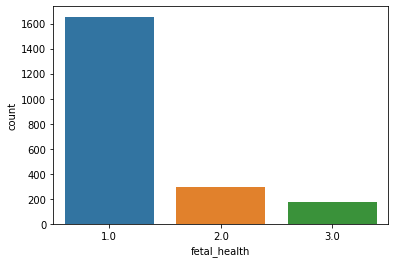

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from itertools import cycle
from sklearn.metrics import roc_curve,precision_recall_curve,average_precision_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns
oversample = RandomOverSampler(sampling_strategy='not majority')
data = pd.read_csv("fetal_health-1.csv")
df=data.head()
print(data['fetal_health'].value_counts())
tem=data['fetal_health'].value_counts()
isbalanced=True
if(((tem[2]+tem[3])/sum(tem))<0.3 or ((tem[2]+tem[3])/sum(tem))>0.7):
    isbalanced=False
else:
    isbalanced=True
sns.countplot(x="fetal_health",data=data)
plt.savefig("counts_unbalanced",dpi=300)
plt.show()

1.0    1655
2.0    1655
3.0    1655
Name: fetal_health, dtype: int64
fetal_health                                              1.000000
abnormal_short_term_variability                           0.287959
accelerations                                             0.247653
prolongued_decelerations                                  0.231784
histogram_mean                                            0.179463
histogram_mode                                            0.177355
mean_value_of_long_term_variability                       0.167335
histogram_median                                          0.166589
histogram_variance                                        0.095770
percentage_of_time_with_abnormal_long_term_variability    0.084345
histogram_tendency                                        0.063432
light_decelerations                                       0.047700
uterine_contractions                                      0.019289
severe_decelerations                                      0.

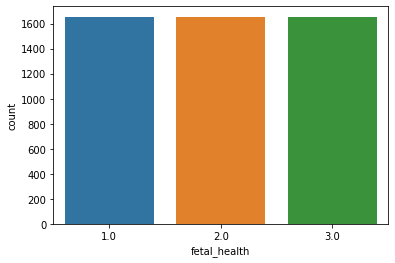

In [7]:
if(isbalanced==False):
    x,y=oversample.fit_resample(data.drop('fetal_health',axis=1),data['fetal_health'])
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=21)
    new_data=pd.DataFrame(x)
    new_data['fetal_health']=y
    print(new_data['fetal_health'].value_counts())
    sns.countplot(x="fetal_health",data=new_data)
    plt.savefig("counts_balanced",dpi=300)
    plt.show()
else:
    x_train, x_test, y_train, y_test = train_test_split(data.drop('fetal_health',axis=1),data['fetal_health'],test_size=0.3,random_state=21)
    new_data=data
cor=new_data.corr()
print((cor['fetal_health']**2).sort_values(ascending=False))

In [8]:
for i in ('abnormal_short_term_variability','prolongued_decelerations','accelerations','percentage_of_time_with_abnormal_long_term_variability','histogram_mean','histogram_mode','histogram_median','mean_value_of_long_term_variability','histogram_variance','percentage_of_time_with_abnormal_long_term_variability','histogram_tendency'):
    pearson_coef,p_value = stats.pearsonr(new_data[i], new_data['fetal_health'])
    print("For ",i,"correlation coefficient is ",pearson_coef," and p-value is ",p_value)
new_data=new_data.drop(['baseline value','histogram_tendency','severe_decelerations','mean_value_of_short_term_variability','fetal_movement','histogram_width','histogram_min','light_decelerations','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes'],axis=1)
print(new_data.head())
x_train=x_train.drop(['light_decelerations','fetal_movement','uterine_contractions','severe_decelerations','histogram_min','histogram_max','mean_value_of_short_term_variability','histogram_width','histogram_number_of_peaks','histogram_number_of_zeroes','baseline value'],axis=1)
x_test=x_test.drop(['light_decelerations','fetal_movement','uterine_contractions','severe_decelerations','histogram_min','histogram_max','mean_value_of_short_term_variability','histogram_width','histogram_number_of_peaks','histogram_number_of_zeroes','baseline value'],axis=1)
model1=DecisionTreeClassifier(criterion="gini",random_state=21)
model1.fit(x_train,y_train)
model2=LogisticRegression(max_iter=10000)
model2.fit(x_train,y_train)
pred_y1 = model1.predict(x_test)
pred_y2 = model2.predict(x_test)
pred_prob1=model1.predict_proba(x_test)
pred_prob2=model2.predict_proba(x_test)

For  abnormal_short_term_variability correlation coefficient is  0.5366181412258619  and p-value is  0.0
For  prolongued_decelerations correlation coefficient is  0.4814390943975697  and p-value is  1.5801657914633786e-286
For  accelerations correlation coefficient is  -0.49764791065734126  and p-value is  4.87496260606718e-309
For  percentage_of_time_with_abnormal_long_term_variability correlation coefficient is  0.2904219902004428  and p-value is  4.244144444968711e-97
For  histogram_mean correlation coefficient is  -0.4236309953456113  and p-value is  1.8237990543421566e-215
For  histogram_mode correlation coefficient is  -0.42113489363279966  and p-value is  1.0702157887345853e-212
For  histogram_median correlation coefficient is  -0.4081525893033268  and p-value is  1.1364801367771389e-198
For  mean_value_of_long_term_variability correlation coefficient is  -0.4090662599051852  and p-value is  1.2263861633112574e-199
For  histogram_variance correlation coefficient is  0.3094667309

In [9]:
# group those suspect with Pathological
c_1=confusion_matrix(y_test, pred_y1)
print(c_1)
print(classification_report(y_test, pred_y1))
c_2=confusion_matrix(y_test, pred_y2)
print(c_2)
print(classification_report(y_test, pred_y2))

[[476  25   1]
 [  3 489   0]
 [  0   0 496]]
              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       502
         2.0       0.95      0.99      0.97       492
         3.0       1.00      1.00      1.00       496

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490

[[411  73  18]
 [ 75 346  71]
 [ 25  63 408]]
              precision    recall  f1-score   support

         1.0       0.80      0.82      0.81       502
         2.0       0.72      0.70      0.71       492
         3.0       0.82      0.82      0.82       496

    accuracy                           0.78      1490
   macro avg       0.78      0.78      0.78      1490
weighted avg       0.78      0.78      0.78      1490



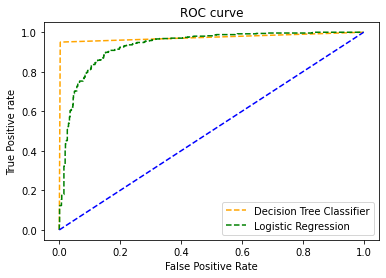

In [10]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,0], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,0], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [11]:
#precision recall curves
# binarize the testing data from each mode for use in multi-class precision-recall curves.
# Prediction probabilities are already in the binarized form so we can use pred_prob1 and
# pred_prob2 without modification

Y_test = label_binarize(y_test, classes=[1,2,3])
n_classes = Y_test.shape[1]

# uncomment to see what the binarized data looks like for further clarification
#print(Y_test)

# decision tree model
precision_y1 = dict()
recall_y1 = dict()
average_precision_y1 = dict()
for i in range(n_classes):
   precision_y1[i], recall_y1[i], _ = precision_recall_curve(Y_test[:, i],
                                                       pred_prob1[:,i])
   average_precision_y1[i] = average_precision_score(Y_test[:, i], pred_prob1[:,i])
precision_y1["micro"], recall_y1["micro"], _ = precision_recall_curve(Y_test.ravel(),
   pred_prob1.ravel())
average_precision_y1["micro"] = average_precision_score(Y_test, pred_prob1,
                                                    average="micro")
print('Average precision score for Decision Tree model, micro-averaged over all classes: {0:0.2f}'
     .format(average_precision_y1["micro"]))

Average precision score for Decision Tree model, micro-averaged over all classes: 0.97


Average precision score for Logistic Regression model, micro-averaged over all classes: 0.86


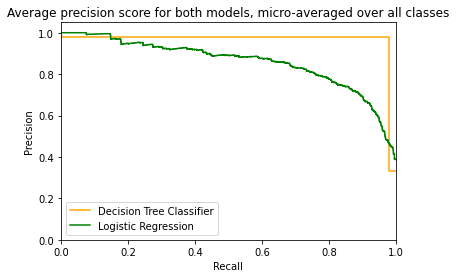

In [12]:
# Logistic Regression Model
precision_y2 = dict()
recall_y2 = dict()
average_precision_y2 = dict()
for i in range(n_classes):
   precision_y2[i], recall_y2[i], _ = precision_recall_curve(Y_test[:, i],
                                                       pred_prob2[:,i])
   average_precision_y2[i] = average_precision_score(Y_test[:, i], pred_prob2[:,i])
precision_y2["micro"], recall_y2["micro"], _ = precision_recall_curve(Y_test.ravel(),
   pred_prob2.ravel())
average_precision_y2["micro"] = average_precision_score(Y_test, pred_prob2,
                                                    average="micro")
print('Average precision score for Logistic Regression model, micro-averaged over all classes: {0:0.2f}'
     .format(average_precision_y2["micro"]))
# Model 1 & 2 avg precision score micro-averaged
plt.figure(2)
plt.step(recall_y1['micro'], precision_y1['micro'], where='post', color='orange',label='Decision Tree Classifier')
plt.step(recall_y2['micro'], precision_y2['micro'], where='post', color='green',label='Logistic Regression')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.legend(loc='best')
plt.title("Average precision score for both models, micro-averaged over all classes")
plt.savefig("avg_precision",dpi=300)
plt.show()

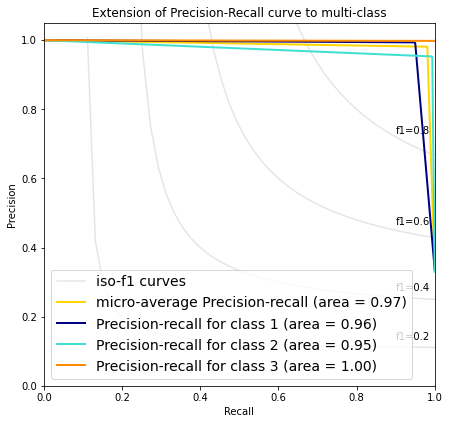

In [13]:
# Plot Precision-Recall curve for the Decision Tree model for each class and iso-f1 curves
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
plt.figure(3,figsize=(7,8))
f_scores = np.linspace(0.2,0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
   x = np.linspace(0.01, 1)
   y = f_score * x / (2 *  x - f_score)
   l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
   plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall_y1["micro"], precision_y1["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'''.format(average_precision_y1["micro"]))

for i, color in zip(range(n_classes), colors):
   l, = plt.plot(recall_y1[i], precision_y1[i], color=color, lw=2)
   lines.append(l)
   labels.append('Precision-recall for class {0} (area = {1:0.2f})'''.format(i+1, average_precision_y1[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc='lower left', prop=dict(size=14))
plt.savefig("tree_precision",dpi=300)

plt.show()

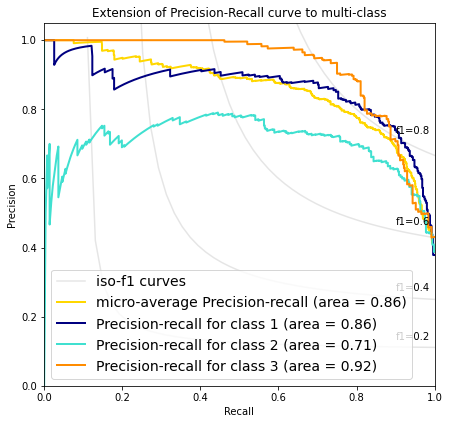

In [14]:
# Plot Precision-Recall curve for the Logistic Regression model for each class and iso-f1 curves
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
plt.figure(3,figsize=(7,8))
f_scores = np.linspace(0.2,0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
   x = np.linspace(0.01, 1)
   y = f_score * x / (2 *  x - f_score)
   l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
   plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall_y2["micro"], precision_y2["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'''.format(average_precision_y2["micro"]))

for i, color in zip(range(n_classes), colors):
   l, = plt.plot(recall_y2[i], precision_y2[i], color=color, lw=2)
   lines.append(l)
   labels.append('Precision-recall for class {0} (area = {1:0.2f})'''.format(i+1, average_precision_y2[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc='best', prop=dict(size=14))
plt.savefig("logistic_precision",dpi=300)

plt.show()

Decision Tree Classifier AUC:  0.9860061785378811
LogisticRegression AUC 0.9189053216498461
number of clusters equals 5: 
      accelerations  uterine_contractions  prolongued_decelerations  \
0             0.000                 0.000                     0.000   
1             0.006                 0.006                     0.000   
2             0.003                 0.008                     0.000   
3             0.003                 0.008                     0.000   
4             0.007                 0.008                     0.000   
...             ...                   ...                       ...   
4960          0.000                 0.002                     0.000   
4961          0.000                 0.003                     0.003   
4962          0.000                 0.003                     0.000   
4963          0.003                 0.000                     0.005   
4964          0.000                 0.009                     0.002   

      abnormal_short_term

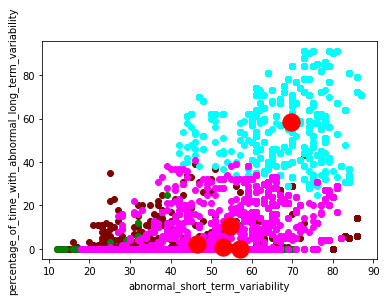

In [15]:
auc_score1 = roc_auc_score(y_test, pred_prob1,multi_class="ovo")
auc_score2 = roc_auc_score(y_test, pred_prob2,multi_class="ovo")
print("Decision Tree Classifier AUC: ", auc_score1)
print("LogisticRegression AUC", auc_score2)
color=['maroon','black','green','cyan','magenta','yellow','purple','pink','grey','bisque','orange','brown','tan','darkblue','aquamarine']
kmeans=KMeans(n_clusters=5,random_state=0)
new_data['clusters']=kmeans.fit_predict(new_data.drop('fetal_health',axis=1),new_data['fetal_health'])
print("number of clusters equals 5: ")
print(new_data)
x_i=3
y_i=4
print(new_data.iloc[:,1].name)
for k in range(5):
    tem=new_data[new_data['clusters']==k]
    plt.scatter(tem.iloc[:,x_i], tem.iloc[:,y_i],c=color[k])
plt.scatter(kmeans.cluster_centers_[:, x_i], kmeans.cluster_centers_[:, y_i], s=300, c='red')
plt.xlabel(new_data.iloc[:,x_i].name)
plt.ylabel(new_data.iloc[:,y_i].name)
plt.savefig('k5')
plt.show()

number of clusters equals 10: 
      accelerations  uterine_contractions  prolongued_decelerations  \
0             0.000                 0.000                     0.000   
1             0.006                 0.006                     0.000   
2             0.003                 0.008                     0.000   
3             0.003                 0.008                     0.000   
4             0.007                 0.008                     0.000   
...             ...                   ...                       ...   
4960          0.000                 0.002                     0.000   
4961          0.000                 0.003                     0.003   
4962          0.000                 0.003                     0.000   
4963          0.003                 0.000                     0.005   
4964          0.000                 0.009                     0.002   

      abnormal_short_term_variability  \
0                                73.0   
1                                1

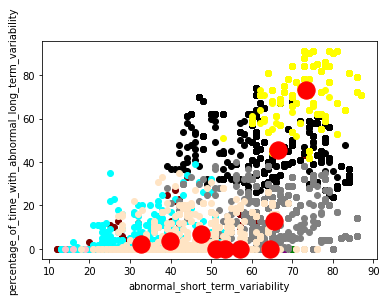

In [16]:
kmeans=KMeans(n_clusters=10,random_state=0)
new_data['clusters']=kmeans.fit_predict(new_data.drop('fetal_health',axis=1),new_data['fetal_health'])
print("number of clusters equals 10: ")
print(new_data)
for k in range(10):
    tem=new_data[new_data['clusters']==k]
    plt.scatter(tem.iloc[:,x_i], tem.iloc[:,y_i],c=color[k])
plt.scatter(kmeans.cluster_centers_[:, x_i], kmeans.cluster_centers_[:, y_i], s=300, c='red')
plt.xlabel(new_data.iloc[:,x_i].name)
plt.ylabel(new_data.iloc[:,y_i].name)
plt.savefig('k10')
plt.show()

number of clusters equals 15: 
      accelerations  uterine_contractions  prolongued_decelerations  \
0             0.000                 0.000                     0.000   
1             0.006                 0.006                     0.000   
2             0.003                 0.008                     0.000   
3             0.003                 0.008                     0.000   
4             0.007                 0.008                     0.000   
...             ...                   ...                       ...   
4960          0.000                 0.002                     0.000   
4961          0.000                 0.003                     0.003   
4962          0.000                 0.003                     0.000   
4963          0.003                 0.000                     0.005   
4964          0.000                 0.009                     0.002   

      abnormal_short_term_variability  \
0                                73.0   
1                                1

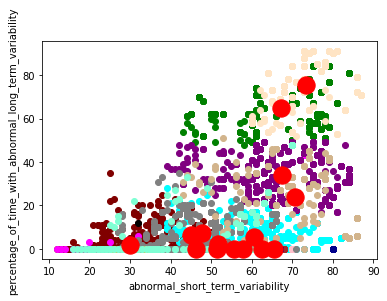

In [17]:
kmeans=KMeans(n_clusters=15,random_state=0)
new_data['clusters']=kmeans.fit_predict(new_data.drop('fetal_health',axis=1),new_data['fetal_health'])
print("number of clusters equals 15: ")
print(new_data)
for k in range(15):
    tem=new_data[new_data['clusters']==k]
    plt.scatter(tem.iloc[:,x_i], tem.iloc[:,y_i],c=color[k])
plt.scatter(kmeans.cluster_centers_[:, x_i], kmeans.cluster_centers_[:, y_i], s=300, c='red')
plt.xlabel(new_data.iloc[:,x_i].name)
plt.ylabel(new_data.iloc[:,y_i].name)
plt.savefig('k15')
plt.show()